In [1]:
using CairoMakie
import SpecialFunctions: erfcx

In [2]:
voigt(a, u) = real(erfcx(a - u*im)) / sqrt(π)
faraday(a, u) = imag(erfcx(a - u*im)) / sqrt(π)

faraday (generic function with 1 method)

In [5]:
function unno_rachkovsky(
    u;
    s0 = 1,
    s1 = 5,
    η = 20,
    a = 0.05,
    g_eff = 1,
    delta_ratio = 1.5,
    γ = π/3,
    χ = 0,
    no_mo=false,
)
    ϕ₀ = voigt.(a, u)
    ϕ_r = voigt.(a, u .+ g_eff * delta_ratio)
    ϕ_b = voigt.(a, u .- g_eff * delta_ratio)
    ψ₀ = faraday.(a, u)
    ψ_r = faraday.(a, u .+ g_eff * delta_ratio)
    ψ_b = faraday.(a, u .- g_eff * delta_ratio)

    ϕ_Δ = 0.5 .* (ϕ₀ .- 0.5 .* (ϕ_b .+ ϕ_r))
    ϕ_I = ϕ_Δ .* (sin(γ)^2) .+ 0.5 .* (ϕ_b .+ ϕ_r)
    ϕ_Q = ϕ_Δ .* (sin(γ)^2) .* cos(2χ)
    ϕ_U = ϕ_Δ .* (sin(γ)^2) .* sin(2χ)
    ϕ_V = 0.5 .* (ϕ_b .- ϕ_r) .* cos(γ)
    ψ_Δ = 0.5 .* (ψ₀ .- 0.5 .* (ψ_b .+ ψ_r))
    ψ_Q = ψ_Δ .* (sin(γ)^2) .* cos(2χ)
    ψ_U = ψ_Δ .* (sin(γ)^2) .* sin(2χ)
    ψ_V = 0.5 .* (ψ_b .- ψ_r) .* cos(γ)

    kI = 1 .+ η * ϕ_I
    kQ = η * ϕ_Q
    kU = η * ϕ_U
    kV = η * ϕ_V
    if no_mo
        fQ = 0 * ψ_Q
        fU = 0 * ψ_U
        fV = 0 * ψ_V
    else
        fQ = η * ψ_Q
        fU = η * ψ_U
        fV = η * ψ_V
    end
        
    dot_kf = kQ .* fQ .+ kU .* fU .+ kV .* fV
    f2sum = fQ.^2 .+ fU.^2 .+ fV.^2
    k2sum = kQ.^2 .+ kU.^2 .+ kV.^2

    Δ = kI.^4 .+ kI.^2 .* (f2sum .- k2sum) .- dot_kf.^2
    I = s0 .+ (s1 ./ Δ) .* kI .* (kI.^2 .+ f2sum)
    Q = -s1 ./ Δ .* (kI.^2 .* kQ .- kI .* (kU .* fV .- kV .* fU) .+ fQ .* dot_kf)
    U = -s1 ./ Δ .* (kI.^2 .* kU .- kI .* (kV .* fQ .- kQ .* fV) .+ fU .* dot_kf)
    V = -s1 ./ Δ .* (kI.^2 .* kV .+ fV .* dot_kf)
    return I, Q, U, V
end


function stokes_plot(I, Q, U, V, u)
    fig = Figure(size=(750,700))
    ax11 = Axis(fig[1,1], xgridvisible=false, ygridvisible=false)
    ax12 = Axis(fig[1,2], yaxisposition=:right, ygridvisible=false)
    ax21 = Axis(fig[2,1], xgridvisible=false, ygridvisible=false)
    ax22 = Axis(fig[2,2], 
        yaxisposition=:right, xgridvisible=false, ygridvisible=false)
    hidexdecorations!(ax11)
    hidexdecorations!(ax12)
    hlines!(ax12, 0, linestyle=:dash, color=:grey) 
    hlines!(ax21, 0, linestyle=:dash, color=:grey) 
    hlines!(ax22, 0, linestyle=:dash, color=:grey) 
    lines!(ax11, u, I)
    lines!(ax12, u, Q)
    lines!(ax21, u, U)
    lines!(ax22, u, V)
    text!(ax11, 0.1, 0.8; text="I", fontsize=30, space=:relative)
    text!(ax12, 0.1, 0.8; text="Q", fontsize=30, space=:relative)
    text!(ax21, 0.1, 0.8; text="U", fontsize=30, space=:relative)
    text!(ax22, 0.1, 0.8; text="V", fontsize=30, space=:relative)
    colgap!(fig.layout, 1, 0)
    rowgap!(fig.layout, 1, 0)
    imm = maximum(I) * 1.05
    quv = imm / 2.85
    ylims!(ax11, 0, imm)
    ylims!(ax12, -quv, quv)
    ylims!(ax21, -quv, quv)
    ylims!(ax22, -quv, quv)
    return ax11, ax12, ax21, ax22, fig
end

stokes_plot (generic function with 1 method)

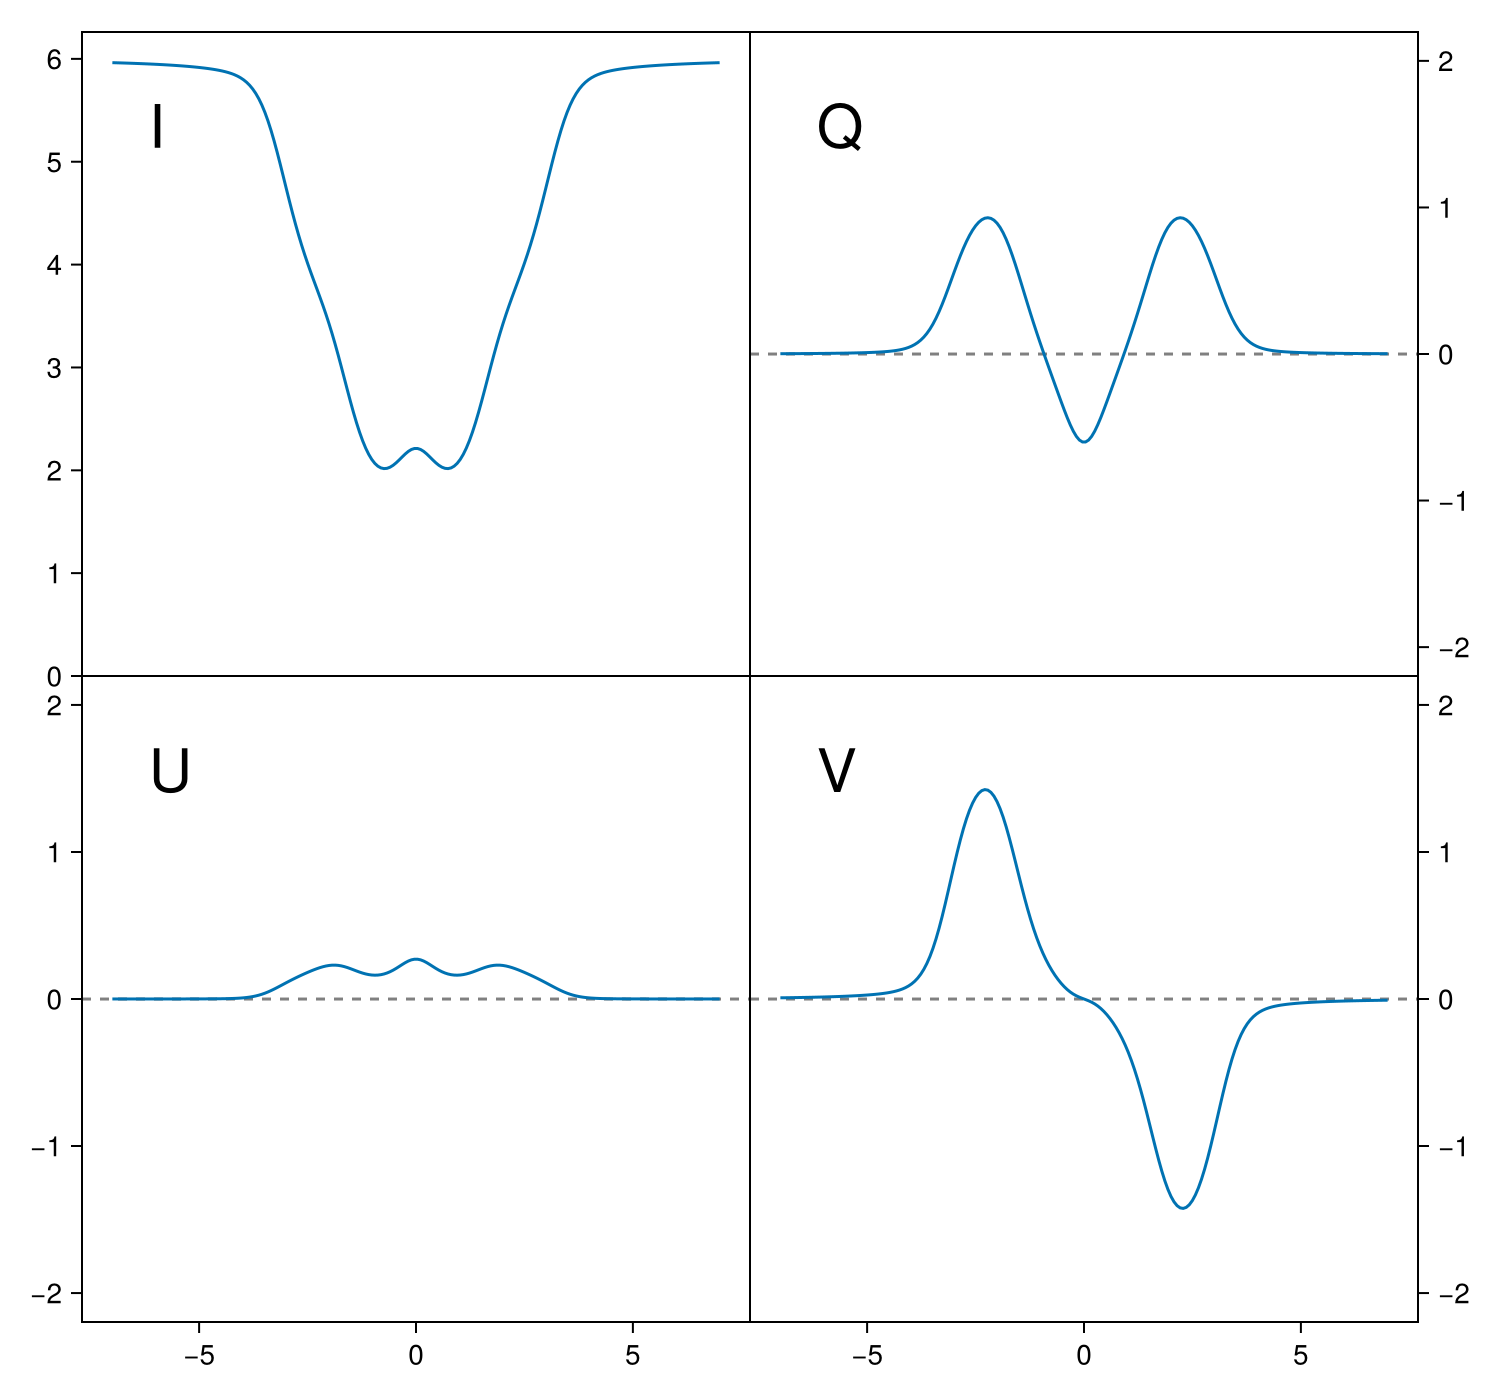

In [9]:
u = range(-7, 7, 200)
i1, q1, u1, v1 = unno_rachkovsky(u, s0=1, s1=5, η=20, a=0.05, g_eff=1, delta_ratio=1.5, γ=π/3, χ=0)
stokes_plot(i1, q1, u1, v1, u)[end]